In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parse import parse
import math
import cv2

In [2]:
train_images, train_labels = parse('facedata/facedatatrain', 'facedata/facedatatrainlabels', True)
validation_images, validation_labels = parse('facedata/facedatavalidation', 'facedata/facedatavalidationlabels', True)
test_images, test_labels = parse('facedata/facedatatest', 'facedata/facedatatestlabels', True)
print(test_i).shape)

(150,)


In [3]:
base_rate_true = np.bincount(train_labels)/train_labels.shape[0]
print(base_rate_true)

[0.51884701 0.48115299]


In [53]:
kernel = np.ones((7,3))
images = np.swapaxes(np.swapaxes(train_images.astype(np.float64), 0, 2), 0, 1)
dst = cv2.filter2D(src = images, ddepth = -1, kernel = kernel, anchor = (0,0))
train_zones = dst[::7,::3,:]

vimages = np.swapaxes(np.swapaxes(validation_images.astype(np.float64), 0, 2), 0, 1)
vdst = cv2.filter2D(src = vimages, ddepth = -1, kernel = kernel, anchor = (0,0))
vzones = vdst[::7,::3,:]


timages = np.swapaxes(np.swapaxes(test_images.astype(np.float64), 0, 2), 0, 1)
tdst = cv2.filter2D(src = timages, ddepth = -1, kernel = kernel, anchor = (0,0))
test_zones = tdst[::7,::3,:]

In [51]:
def train_perceptron_faces(passes, labels, zones):
    weights = np.zeros(200)
    bias = 0
    for k in range(passes):
        for i in range(len(labels)):
            arr = zones[:,:,i].ravel()
            b = np.dot(weights, arr) +bias
            if b < 0 and labels[i] == True:
                weights += arr
                bias += 1
            elif b >= 0 and labels[i] == False:
                weights -= arr
                bias -= 1
    return weights, bias


In [52]:
def run_perceptron_faces(weights, labels, zones, bias):
    tally = 0
    for i in range(len(labels)):
        arr = zones[:,:,i].ravel()
        b = np.dot(weights, arr) + bias 
        if (b >= 0 and labels[i] == True) or (b < 0 and labels[i] == False):
            tally += 1
    return (tally/len(labels))


In [56]:
w, b = train_perceptron_faces(1000, train_labels, train_zones)

run_perceptron_faces(w, validation_labels, vzones, b)

0.9003322259136213

In [57]:
def run_percentage(zones, labels, tzones, tlabels):
    accuracy = np.zeros(10, dtype=np.float64)
    for i in range(1,11):
        amount = int(0.1 * i * len(zones[0][0]) -1)
        available_indices = np.random.choice(len(zones[0][0]), amount, replace = False)
        available_zones = zones[:,:,available_indices]
        available_labels= labels[available_indices]
        w, b = train_perceptron_faces(100, available_labels, available_zones)
        accuracy[i-1] = run_perceptron_faces(w, tlabels, tzones, b)
    return accuracy

[0.74       0.84666667 0.87333333 0.88       0.85333333 0.86666667
 0.87333333 0.88       0.89333333 0.91333333]


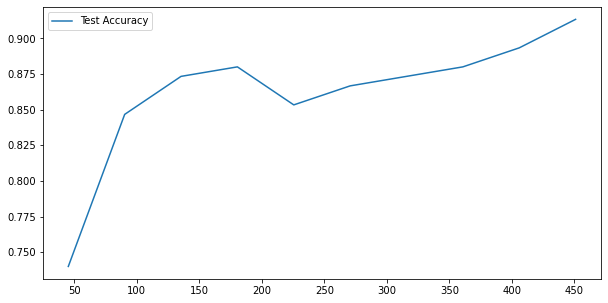

In [62]:
x = np.linspace(.1*train_images.shape[0], train_images.shape[0], 10)
acc = run_percentage(train_zones, train_labels, test_zones, test_labels)
print(acc)
plt.figure(figsize = (10, 5))
plt.plot(x, acc[:], label = "Test Accuracy")
plt.legend()